# Perform standard imports

In [1]:
id = 336490271
Student_name = 'Valentin Gundorov'

Note: This work contains numerous comments, which were included for learning purposes and for future reference. I hope this does not hinder the evaluation.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

# Load the MNIST dataset

In [3]:
transform = transforms.ToTensor()

# Load the training set

In [4]:
train_data = datasets.MNIST(root='Data', train=True, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()

# Load the test set

In [5]:
test_data = datasets.MNIST(root='Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
type(train_data)

torchvision.datasets.mnist.MNIST

# Examine a training record and exploring data

In [7]:
train_data[33]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
image,label = train_data[33]

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
label

9

# Picture example plot

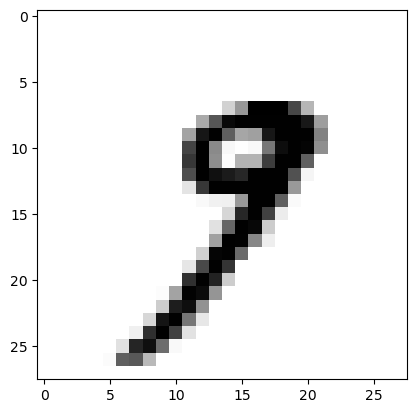

In [11]:
plt.imshow(image.reshape((28,28)), cmap = 'gist_yarg')

# Class distribution.

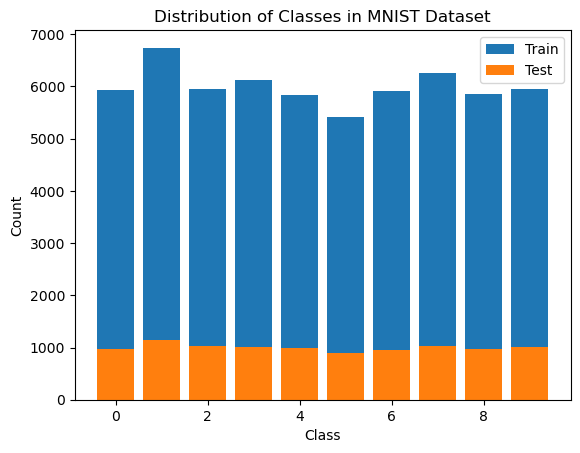

In [12]:
class PlotDist:
    def __init__(self, train_dataset, test_dataset):
        self.train_dataset = train_dataset
        self.test_dataset = test_dataset

    def plot(self):
        train_classes_count = {}
        for _, label in self.train_dataset:
            if label not in train_classes_count:
                train_classes_count[label] = 0
            train_classes_count[label] += 1

        test_classes_count = {}
        for _, label in self.test_dataset:
            if label not in test_classes_count:
                test_classes_count[label] = 0
            test_classes_count[label] += 1

        fig, ax = plt.subplots()
        ax.bar(train_classes_count.keys(), train_classes_count.values(), label='Train')
        ax.bar(test_classes_count.keys(), test_classes_count.values(), label='Test')
        ax.set_xlabel('Class')
        ax.set_ylabel('Count')
        ax.set_title('Distribution of Classes in MNIST Dataset')
        ax.legend()
        plt.show()

plotter = PlotDist(train_data, test_data)
plotter.plot()

# Batch loading with DataLoader

In [13]:
train_loader = DataLoader(train_data,batch_size = 100,shuffle=True)

test_loader = DataLoader(test_data,batch_size = 500 ,shuffle=False)

In [14]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}')) # formatting

In [15]:
#first batch
for images,labels in train_loader:
    break 

In [16]:
images.shape

torch.Size([100, 1, 28, 28])

# View examples 

Labels:  [   9    7    5    1    6    5    7    8    9    6    3    9]


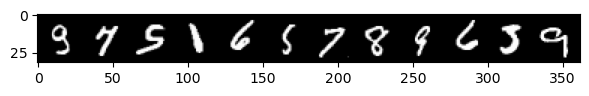

In [17]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(7,2))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# ANN - Perceptron Model

In [18]:
import torch.nn.functional as F

class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
        self.dropout = nn.Dropout(0.5)  
    
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.dropout(X)  
        X = F.relu(self.fc2(X))
        X = self.dropout(X) 
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)


In [19]:
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [20]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


94080: all conections from 784 to 120

120: biases

10080 :all connectors into next layer

84: biases

840:all connections into the next layer 84 prevoius to 10 output neurons

10: output neurons

sum of those 105,214 total parameters that are being adjusted by the network

# Optimizer


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [22]:
images.shape

torch.Size([100, 1, 28, 28])

Size([100, 1, 28, 28]) --> Size([100, 1, 784])

In [23]:
images.view(100,-1).shape

torch.Size([100, 784])

# Training DATA

In [24]:

epochs = 11

#Trackers 
    #for conduction a training of the network,it's allows to 
        #print statistics
            #to see the results on the plot
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):#to know how we're getting correct trn_corr = 0 tst_corr = 0
    trn_corr = 0
    tst_corr = 0
    
    # Training
    for b, (X_train, y_train) in enumerate(train_loader, 1):
        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)
        # Tally the number of correct predictions
    
        #At the very last layer we have those 10 neurons
        #[0.1,0.0,.....,0.8] ---> prediction
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        # How many matches do we actually have where predicted value is equal 
                    # to Y training value. 
        #And sum will give how many we got correct off that batch
        
        
         # Update parameters
        # backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
   # Update train loss & accuracy for the epoch
    train_losses.append(loss) #training loss
    train_correct.append(trn_corr) #train_corr to see how many we got correct during training
    #that takes care of the training portion. 
       #We want to run test data during tha training. This will allow to understand
       #how our test validation is going down and eventially after a certain number
       #of epochs.
       #We should see less return on the test results versus training results 
    
    # Testing
    with torch.no_grad():# we not updating the weighs and biases.
                            #That way we're not influenced by the actual test set
        for X_test, y_test in test_loader:
            y_val = model(X_test.view(500, -1))# Here we flatten X_test
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    
    # Print statistics
    acc = trn_corr.item() * 100 / len(train_loader.dataset)
    print(f'Epoch {i}  Training Loss: {train_losses[-1]:.5f} Training Accuracy: {acc:.2f}%')


Epoch 0  Training Loss: 0.33522 Training Accuracy: 79.83%
Epoch 1  Training Loss: 0.36547 Training Accuracy: 90.51%
Epoch 2  Training Loss: 0.27985 Training Accuracy: 92.32%
Epoch 3  Training Loss: 0.25639 Training Accuracy: 93.23%
Epoch 4  Training Loss: 0.25415 Training Accuracy: 93.65%
Epoch 5  Training Loss: 0.18530 Training Accuracy: 94.14%
Epoch 6  Training Loss: 0.23994 Training Accuracy: 94.42%
Epoch 7  Training Loss: 0.32552 Training Accuracy: 94.63%
Epoch 8  Training Loss: 0.14443 Training Accuracy: 94.94%
Epoch 9  Training Loss: 0.07804 Training Accuracy: 95.06%
Epoch 10  Training Loss: 0.12332 Training Accuracy: 95.18%


# Plot the loss and accuracy comparisons

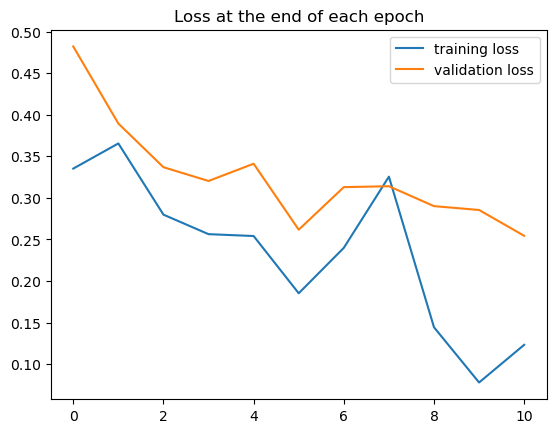

In [25]:
import numpy as np
import matplotlib.pyplot as plt

train_losses_np = np.array([x.detach().numpy() for x in train_losses])
test_losses_np = np.array([x.detach().numpy() for x in test_losses])

plt.plot(train_losses_np, label='training loss')
plt.plot(test_losses_np, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend()
plt.show()

In [26]:
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') 
# print the most recent result as a percent

Test accuracy: 94.370%


In [27]:
train_acc  = [t/600 for t in train_correct] #batch - 600
train_acc

[tensor(79.8350),
 tensor(90.5100),
 tensor(92.3217),
 tensor(93.2283),
 tensor(93.6500),
 tensor(94.1367),
 tensor(94.4183),
 tensor(94.6317),
 tensor(94.9450),
 tensor(95.0650),
 tensor(95.1767)]

In [28]:
test_acc = [t/100 for t in train_correct] #batch -100

In [29]:
test_acc

[tensor(479.0100),
 tensor(543.0600),
 tensor(553.9300),
 tensor(559.3700),
 tensor(561.9000),
 tensor(564.8200),
 tensor(566.5100),
 tensor(567.7900),
 tensor(569.6700),
 tensor(570.3900),
 tensor(571.0600)]

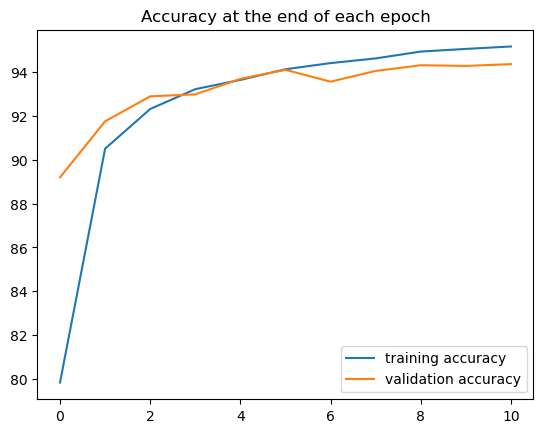

In [30]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [31]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [32]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [33]:
print(f'{100*correct.item()/len(test_data)}%')

94.31%


# Examine the misses

In [34]:
misses = np.where(predicted != y_test)[0]
print("Total number of misses:", len(misses))
print("First 10 misses indices:", misses[:10])

Total number of misses: 569
First 10 misses indices: [  18   33   62   72   83   84  124  133  175  195]


In [35]:
misses[:20]

array([  18,   33,   62,   72,   83,   84,  124,  133,  175,  195,  233,
        241,  245,  257,  259,  264,  266,  290,  313,  321], dtype=int64)

In [36]:
r = 10
row = iter(np.array_split(misses, len(misses) // r + 1))

Indices:     [  18   33   62   72   83   84  124  133  175  195]
Labels:      [   3    4    9    2    7    8    7    7    7    3]
Predictions: [   8    0    8    3    9    5    4    3    3    5]


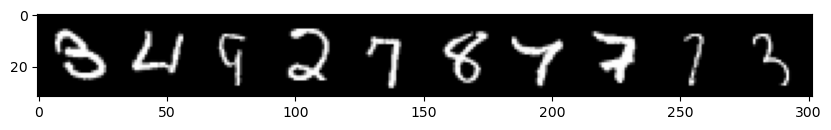

In [37]:
next_row = next(row)
print("Indices:    ", next_row)
print("Labels:     ", y_test[next_row].numpy())
print("Predictions:", predicted[next_row].numpy())

images = X_test[next_row]
image_grid = make_grid(images, nrow=r)
plt.figure(figsize=(10, 4))
plt.imshow(np.transpose(image_grid.numpy(), (1, 2, 0)))
plt.show()